# Week 2 - K-nearest Neighbors (KNN)
<img align="right" style="padding-right:10px;" src="figures_wk2/knn.png" width=500><br>
**FTE Overview:**
K-nearest Neighbors (KNN)
* Overview
* A Bit of Theory
* KNN: Regressor vs Classifier
* KNN Demo - Auto data set
   - Loading Data
   - EDA - just a little bit
   - What are you trying to investigate?
   - Defining your features and targets
   - Splitting your data set - training and test sets
   - Setting up the KNNRegressor
   - Determining the Optimal number of Clusters
   - PCA: Visualize your KNN Model
* Improving your model - Normalizing Data

## K-nearest Neighbors (KNN)
(https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)<br>

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. 

KNN is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. 

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

### A Bit of Theory
The theory behind the KNN algorithm is one of the simplest  supervised machine learning algorithms. 

KNN simply calculates the distance of a new data point to all other training data points. This distance can be calculated by a variety of methods. The most common are Euclidean, Manhattan, and Minowski. 

KNN then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.
<img align="center" style="padding-right:10px;" src="figures_wk2/theory1.png" width=400><br>

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. 

Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.
<img align="center" style="padding-right:10px;" src="figures_wk2/theory2.png" width=400><br>

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. 

From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

### KNN: Regressor vs Classifier
What's the difference between a KNN Regressor and KNN Classifier?
* KNN regression tries to predict the value of the output variable by using a local average. The regressor model works best when the codomain is continuous. 
* KNN classification attempts to predict the class to which the output variable belong by computing the local probability. The classifier model works best when the codomain is discrete.

As an example, if you were trying to predict the time it took for a pizza delivery company to delivery a pizza, you would be working with a codomain (your target value) that is continuous. 

Another important note, like many other machine learning algorithms, KNN only works with all numerical data. If your dataset has categorical values, you will need to convert them into numeric representations.<br>

Here are some resources on how to do this:<br>
https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

### KNN Demo - Auto data set
For this demonstration, we will be using a data set that I have already cleaned up (replaced all the NaN). Normally that would be your first step in building a machine learning algorithm.

In [1]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Loading our data set

In [3]:
# loading our data set
auto = pd.read_csv('data_wk2/auto.dt.nona.csv')

In [4]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


#### EDA - just a little bit

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model.year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [6]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.127154,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.315134,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### What are you trying to investigate?
At this point we need to define a question that we wish to investigate. I'm going to use a correlation matrix to look for possible realtionships within our data set.

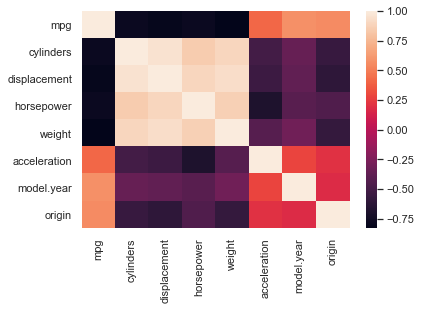

In [7]:
_ = sns.heatmap(auto.corr())

<div class="alert alert-block alert-info">
<b>Pop Quiz::</b> What does the '_' mean in the cell above? <br>

Answer: Signifies a temporary variable that we don't intend to use going forward.
</div>

Looking at the correlatin matirx, we can see a strong correlation between mpg and four other columns. We can also see that acceleration, model.year and origin appear to have less significance to mpg.

Given this information, I'm going to set mpg as my target variable and remove acceleration, model.year and origin from the dataset.

In [8]:
# trimming our data set
auto.drop(['acceleration', 'model.year', 'origin'],axis=1, inplace=True)

In [9]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449
5,15.0,8,429.0,198.0,4341
6,14.0,8,454.0,220.0,4354
7,14.0,8,440.0,215.0,4312
8,14.0,8,455.0,225.0,4425
9,15.0,8,390.0,190.0,3850


#### Defining our features and targets
Target(s) are the values that we are trying to predict and features are what we are using to predict our target(s).

In [10]:
cols = auto.columns
target_col = 'mpg'
feat_cols = [c for c in cols if c != target_col]

# there is nothing magical about the X and y notation here. 
# however, it seems to be a fairly standard notation, so we will use is here
X = auto[feat_cols].values
y = auto[target_col].values

#### Splitting your data set into training and test sets
Now we are creating the train and test splits. We make a training set so we can train all of our models on the train set. We can then compare how the models compare by evaluating performance on the test set. Train and tests sets should never contain any of the same data. The idea is the model has never seen the test set before, so we can check if our model is overfitting (high variance) and which model works best on unseen data. Sometimes the test data is called the ‘holdout set’.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-info">
<b>Pop Quiz::</b> What does the 'random_state' mean in the cell above do? <br>

Answer: random_state sets a seed to the random generator, so that your train-test splits are always deterministic. Meaning your results will be reproducible if you were to re-run this notebook.
</div>

#### Setting up the KNN Regressor
Since our target value (mpg) is continuous, we will use sklearn.KNeighborsRegressor.

For right now, we are simply going to use k=3 for our number of clusters.

In [12]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [13]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[33.  28.  19.  13.  14.  27.  24.  13.  17.  21.  15.  38.  26.  15.
 25.  12.  31.  17.  16.  31.  22.  22.  22.  33.5 18.  44.  26.  24.5
 18.1 12.  27.  36.  23.  24.  37.2 16.  21.  19.2 16.  29.  26.8 27.
 18.  10.  23.  36.  26.  25.  25.  25.  22.  34.1 32.4 13.  23.5 14.
 18.5 29.8 28.  19.  11.  33.  23.  21.  23.  25.  23.8 34.4 24.5 13.
 34.7 14.  15.  18.  25.  19.9 17.5 28.  29.  17. ]
Predictions for test data set
[34.4        30.5        23.6        15.         15.33333333 27.03333333
 22.56666667 13.33333333 15.16666667 21.46666667 15.4        35.7
 32.16666667 16.23333333 28.93333333 11.66666667 24.16666667 23.73333333
 14.66666667 35.7        28.36666667 22.63333333 18.33333333 33.9
 18.56666667 34.93333333 24.         25.23333333 22.26666667 11.66666667
 23.83333333 31.86666667 15.66666667 25.06666667 33.6        14.16666667
 28.73333333 17.         13.         30.53333333 26.8        28.43333333
 23.06666667 12.66666667 26.7        27.3333

In [14]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-1.4        -2.5        -4.6        -2.         -1.33333333 -0.03333333
  1.43333333 -0.33333333  1.83333333 -0.46666667 -0.4         2.3
 -6.16666667 -1.23333333 -3.93333333  0.33333333  6.83333333 -6.73333333
  1.33333333 -4.7        -6.36666667 -0.63333333  3.66666667 -0.4
 -0.56666667  9.06666667  2.         -0.73333333 -4.16666667  0.33333333
  3.16666667  4.13333333  7.33333333 -1.06666667  3.6         1.83333333
 -7.73333333  2.2         3.         -1.53333333  0.         -1.43333333
 -5.06666667 -2.66666667 -3.7         8.66666667 -4.3        -2.
  1.         -8.53333333  1.         -1.6         7.73333333 -0.66666667
 -1.6         1.66666667  3.5         3.1        -1.9        -0.9
 -4.33333333 -1.4        -5.         -6.13333333  1.53333333  2.
  0.8         1.16666667 -4.5        -2.16666667  0.06666667 -1.16666667
  0.5        -7.33333333  2.93333333  0.7        -1.06666667  3.2
 -1.5         0.76666667]


Just printing out the predictions and differences doesn't really work for a larger data set. [skleam.metric](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) is a great package to look at the accuracy of your model. Just make sure you are matching your evaluation metric with the type of algorithm you used.

We will take a look at several of the available metrics for our KNNRegressor model below.

In [15]:
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.7532098674876971


In [16]:
# Explained variance regression score function
# Best possible score is 1.0, lower values are worse.

from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

0.756425950774052


Hmmm... A r2_score of .75 isn't all that bad.  Especially since we just guessed on the number of clusters.  Perhaps there is away to be "smarter" about selecting the number of clusters.

#### Determining the optimal number of clusters
Let's loop through a range of k values and store the accuracy of the various models.   then we can graphically display the accuracy scores to determine the optimal number of clusters. 

Note: For KNeighborsRegressor, score retrns the r2_score from sklearn.metrics.<br>
(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [17]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['cylinders', 'displacement', 'horsepower', 'weight'] 
Target: mpg
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


In [18]:
scores

[0.7200199566853442,
 0.7532098674876971,
 0.7707141861600249,
 0.760450122758956,
 0.7607346326180134,
 0.7555157063850226,
 0.7660375645543788,
 0.7676637574059654,
 0.7799653850083771,
 0.7743402066316343,
 0.7840495606001879,
 0.7862759667265933,
 0.7768881783410926,
 0.7637634243653031,
 0.76922413510762,
 0.7701092940642451,
 0.7661354064275062,
 0.7725000893408634]

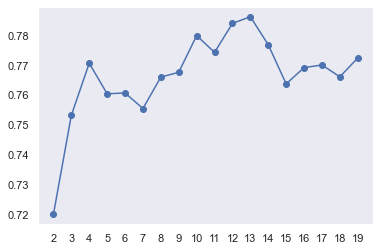

In [19]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

So what is this plot trying to tell us? <br>

We loaded accuracy scores into the array that this plot is based off of. We can validate this by comparing the r2_score from our work above with the plot itself.  So, we would expect k=3 to be around .75. (red circle)

<img align="center" style="padding-right:10px;" src="figures_wk2/plot1.png" width=400><br>

Yup! we have a match.

The green arrow is showing that at k=13, we have the highest r2_score value.  That would lead us to believe that 13 is the optimal number of clusters for our data set and this algorithm.

Let's re-run the model for k=13 and verify our assumptions.

In [20]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=13, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[33.  28.  19.  13.  14.  27.  24.  13.  17.  21.  15.  38.  26.  15.
 25.  12.  31.  17.  16.  31.  22.  22.  22.  33.5 18.  44.  26.  24.5
 18.1 12.  27.  36.  23.  24.  37.2 16.  21.  19.2 16.  29.  26.8 27.
 18.  10.  23.  36.  26.  25.  25.  25.  22.  34.1 32.4 13.  23.5 14.
 18.5 29.8 28.  19.  11.  33.  23.  21.  23.  25.  23.8 34.4 24.5 13.
 34.7 14.  15.  18.  25.  19.9 17.5 28.  29.  17. ]
Predictions for test data set
[34.24615385 26.36923077 26.39230769 15.09230769 15.         31.36923077
 23.41538462 12.53846154 14.69230769 22.45384615 16.20769231 32.56153846
 31.46923077 15.51538462 26.85384615 12.61538462 27.06153846 21.56923077
 14.96153846 33.77692308 27.54615385 21.53076923 22.30769231 34.16923077
 18.00769231 34.85384615 26.6        24.82307692 19.35384615 12.61538462
 23.61538462 33.66153846 15.13076923 27.41538462 32.39230769 14.26153846
 26.16923077 18.50769231 13.41538462 29.89230769 26.12307692 34.23846154
 24.53846154 12.84615385 27.54

In [21]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[-1.24615385e+00  1.63076923e+00 -7.39230769e+00 -2.09230769e+00
 -1.00000000e+00 -4.36923077e+00  5.84615385e-01  4.61538462e-01
  2.30769231e+00 -1.45384615e+00 -1.20769231e+00  5.43846154e+00
 -5.46923077e+00 -5.15384615e-01 -1.85384615e+00 -6.15384615e-01
  3.93846154e+00 -4.56923077e+00  1.03846154e+00 -2.77692308e+00
 -5.54615385e+00  4.69230769e-01 -3.07692308e-01 -6.69230769e-01
 -7.69230769e-03  9.14615385e+00 -6.00000000e-01 -3.23076923e-01
 -1.25384615e+00 -6.15384615e-01  3.38461538e+00  2.33846154e+00
  7.86923077e+00 -3.41538462e+00  4.80769231e+00  1.73846154e+00
 -5.16923077e+00  6.92307692e-01  2.58461538e+00 -8.92307692e-01
  6.76923077e-01 -7.23846154e+00 -6.53846154e+00 -2.84615385e+00
 -4.54615385e+00  5.14615385e+00 -1.44615385e+00 -2.30769231e+00
 -1.55384615e+00 -3.48461538e+00 -4.60769231e+00  5.15384615e-01
  5.21538462e+00 -9.15384615e-01 -2.69230769e+00  5.84615385e-01
  3.33076923e+00  3.36923077e+00  1.85384615e+00  2.6153

Hooray! That all turned out as expected. The r2_score for our KNNRegresor with k=13 is approximately .79. Which is a fairly descent score overall. 

#### PCA: Visualize your KNN model
We can also use PCA to visualize high-dimensional data in 2 or 3 dimensions. PCA essentially distills data down into new features that are capturing the most variance in the data.

Basically, PCA captures the essence of the data in a few principal components, which convey the most variation in the dataset.  We can display this variation in a graphical format.

To start off we fit the PCA model with our training set and then transform the test set against that training set.

In [22]:
pc = PCA()
tr_pca = pc.fit_transform(X_train)
te_pca = pc.transform(X_test)

Let's start by plotting the variation within the training set. The clustering is based off our training_set target variable ('mpg').

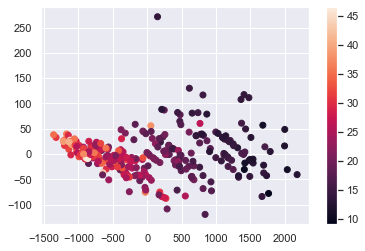

In [23]:
# indexing of a matrix in Python (numpy) is [rows, cols]
_ = plt.scatter(tr_pca[:, 0], tr_pca[:, 1], c=y_train)
_ = plt.colorbar()

Now let's look at the variation in the test set and the clustering is off of the target values in the test set.

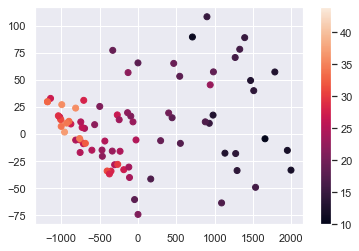

In [24]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=y_test)
_ = plt.colorbar()

Slight variation on the above graph, this time we will look at the test set and cluster based on our preditions from our KNN model above.

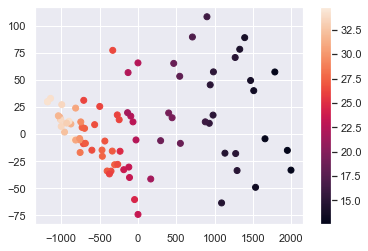

In [25]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=preds)
_ = plt.colorbar()

Not as valuable of a graph, but we are here. We can look at the test set and cluster based on the differences between our test set and the predictions from our KN model.

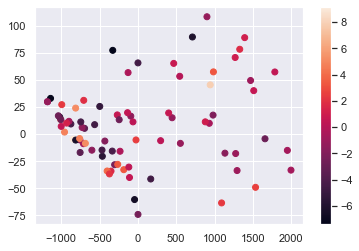

In [26]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=differs)
_ = plt.colorbar()

### Improving your model - Normalizing Data
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

Let's take a look at our data set again.

In [27]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.127154,2970.424623
std,7.815984,1.701004,104.269838,38.315134,846.841774
min,9.000000,3.000000,68.000000,46.000000,1613.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000


In [28]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449
5,15.0,8,429.0,198.0,4341
6,14.0,8,454.0,220.0,4354
7,14.0,8,440.0,215.0,4312
8,14.0,8,455.0,225.0,4425
9,15.0,8,390.0,190.0,3850


We can see that our data set does have quite a bit of variation in the scale f each column.  So, let's try normalizing our data set.

There are a number of methods to achieve this result, but I'm going to stick to the methods that are included in the sklearn package `preprocessing` and use the MinMaxScaler().

[MinMaxScaler::](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:<br>
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))<br>
X_scaled = X_std * (max - min) + min where min, max = feature_range.

Another popular scaler is [sklear.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Remember that you have already seperated our feature columns from our target column from above. 

X = features (cylinders, displacement, horsepower, weight)
y = target (mpg)

In [29]:
# we only want to normalize our feature columns in the dataset and I don't want to resplit the dataset.
# So, I will normalize the X_train and X_test only
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_tr_norm = min_max_scaler.fit_transform(X_train)
X_te_norm = min_max_scaler.fit_transform(X_test)

Let's reconstruct the train and test sets as dataframes to visually see what the normalized data looks like

In [30]:
new_auto_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
new_auto_tr['mpg'] = y_train
new_auto_tr.head(10)

,cylinders,displacement,horsepower,weight,mpg
0,1.0,0.609819,0.581006,0.516019,16.0
1,0.2,0.074935,0.234637,0.146583,27.0
2,0.2,0.059432,0.122905,0.116813,37.0
3,0.2,0.059432,0.078212,0.053020,36.1
4,0.2,0.121447,0.273743,0.306493,23.0
5,1.0,0.857881,0.720670,0.785937,14.0
6,0.2,0.025840,0.033520,0.105472,32.8
7,0.2,0.077519,0.106145,0.217465,29.9
8,0.2,0.074935,0.234637,0.188829,20.0
9,1.0,0.932817,0.849162,0.946697,12.0


In [31]:
new_auto_te = pd.DataFrame(X_te_norm,columns=feat_cols)
new_auto_te['mpg'] = y_test
new_auto_te.head(10)

,cylinders,displacement,horsepower,weight,mpg
0,0.0,0.014124,0.005618,0.000000,33.0
1,0.0,0.096045,0.151685,0.262658,28.0
2,0.5,0.412429,0.269663,0.265506,19.0
3,1.0,0.655367,0.550562,0.678797,13.0
4,1.0,0.655367,0.550562,0.772785,14.0
5,0.0,0.031073,0.202247,0.096519,27.0
6,0.0,0.152542,0.224719,0.338608,24.0
7,1.0,1.000000,0.915730,0.930380,13.0
8,1.0,0.491525,0.325843,0.716772,17.0
9,0.5,0.322034,0.239830,0.341772,21.0


I'm not going to randomly guess at a number of clusters to use, we will want the optimal number eventually.

In [32]:
scores_norm = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model_norm = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model_norm.fit(X_tr_norm, y_train)
    scores_norm.append(model_norm.score(X_te_norm, y_test))

Features: ['cylinders', 'displacement', 'horsepower', 'weight'] 
Target: mpg
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


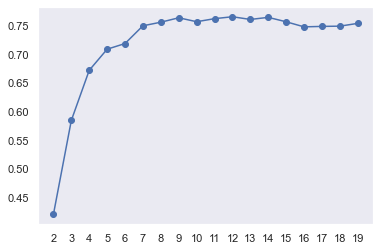

In [33]:
# display the resutls
plt.plot(range(2, 20), scores_norm)
plt.scatter(range(2, 20), scores_norm)
plt.grid()
_ =plt.xticks(range(2, 20))

Oooohhh! It's a close call between k=9, K=12 and k=14.  I'm going to go with k=12, all three should really be looked at.

In [35]:
# define and fit our model with k=12
model_norm = KNeighborsRegressor(n_neighbors=12, n_jobs=-1)
model_norm.fit(X_tr_norm, y_train)

# gather the predictations that our model made for our test set
preds_norm = model_norm.predict(X_te_norm)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_norm)

Actuals for test data set
[33.  28.  19.  13.  14.  27.  24.  13.  17.  21.  15.  38.  26.  15.
 25.  12.  31.  17.  16.  31.  22.  22.  22.  33.5 18.  44.  26.  24.5
 18.1 12.  27.  36.  23.  24.  37.2 16.  21.  19.2 16.  29.  26.8 27.
 18.  10.  23.  36.  26.  25.  25.  25.  22.  34.1 32.4 13.  23.5 14.
 18.5 29.8 28.  19.  11.  33.  23.  21.  23.  25.  23.8 34.4 24.5 13.
 34.7 14.  15.  18.  25.  19.9 17.5 28.  29.  17. ]
Predictions for test data set
[32.91666667 27.31666667 19.70833333 15.475      15.29166667 26.73333333
 24.45833333 13.375      16.7        20.125      14.29166667 34.38333333
 34.38333333 15.75833333 28.36666667 13.         26.03333333 22.25833333
 14.04166667 32.83333333 28.15833333 20.125      19.625      29.51666667
 17.1        34.425      26.45833333 26.93333333 19.275      13.08333333
 25.925      32.94166667 16.73333333 24.35       32.06666667 13.
 22.53333333 16.525      14.53333333 27.63333333 22.53333333 33.25833333
 22.68333333 12.58333333 25.43333333 2

In [36]:
differs_norm = y_test - preds_norm

print(f'Differences between the two sets:\n{differs_norm}')

print(f'r2_score: {r2_score(y_test,preds_norm)}')

Differences between the two sets:
[ 0.08333333  0.68333333 -0.70833333 -2.475      -1.29166667  0.26666667
 -0.45833333 -0.375       0.3         0.875       0.70833333  3.61666667
 -8.38333333 -0.75833333 -3.36666667 -1.          4.96666667 -5.25833333
  1.95833333 -1.83333333 -6.15833333  1.875       2.375       3.98333333
  0.9         9.575      -0.45833333 -2.43333333 -1.175      -1.08333333
  1.075       3.05833333  6.26666667 -0.35        5.13333333  3.
 -1.53333333  2.675       1.46666667  1.36666667  4.26666667 -6.25833333
 -4.68333333 -2.58333333 -2.43333333  8.59166667 -4.          2.31666667
  0.73333333 -6.88333333 -8.74166667  1.84166667  0.61666667 -0.58333333
  2.025       0.5         3.63333333  4.48333333  3.10833333 -0.94166667
 -3.04166667  0.08333333 -3.14166667 -4.125       2.54166667 -0.05833333
 -2.65833333  0.8        -9.56666667 -2.85833333 -0.18333333 -1.125
  1.625      -0.75        3.63333333  1.375      -1.225       3.11666667
 -5.71666667  0.21666667]
r2_s

Let's compare the r2_scores between our two data sets (auto and new_auto)<br>
   * original: r2_score = 0.7863
   * normalized data: r2_score = 0.766
   
Very interesting!  The normalized data actually perform worse in this instance. There is not guarantee that normalizing your data will improve the accuracy of your model.  It's just one technique available to use.

Here are some suggestions:<br>
1) Add more data<br>
2) Treat missing and Outlier values<br>
3) Feature Engineering<br>
4) Feature Selection<br>
5) Multiple algorithms<br>
6) Algorithm Tuning<br>
7) Cross Validation<br>